<a href="https://colab.research.google.com/github/Shruti-83/EDA-on-Air-Quality/blob/main/edaOnAirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Step 1: Install & Import Required Libraries
!pip install -q kaggle
!pip install -q plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os, zipfile
import kagglehub


In [5]:
# Download the dataset
path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")

print("Dataset downloaded to:", path)

100%|██████████| 72.9M/72.9M [00:00<00:00, 209MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/rohanrao/air-quality-data-in-india/versions/12


In [6]:
# List files in the dataset folder
files = os.listdir(path)
print("Files:", files)

# Load one of the main datasets — e.g., 'city_day.csv'
data_path = os.path.join(path, 'city_day.csv')
df = pd.read_csv(data_path)

# Preview the dataset
df.head()

Files: ['city_hour.csv', 'stations.csv', 'station_hour.csv', 'station_day.csv', 'city_day.csv']


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


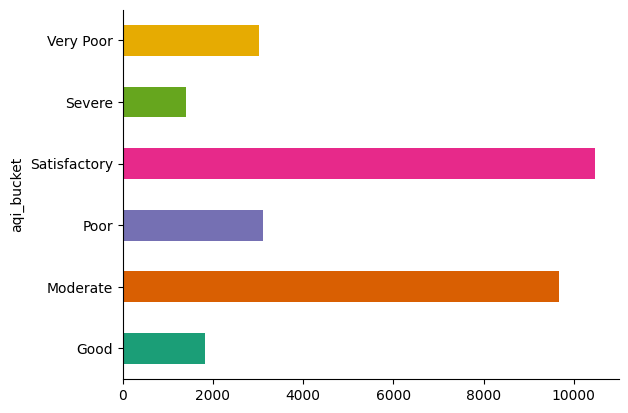

In [28]:
# @title aqi_bucket

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('aqi_bucket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
#Basic Dataset information

# Shape and types
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Summary statistics
df.describe()

#insights :

# The dataset contains 29531 rows and 16 columns.
# Columns like pm2_5, pm10, no2, so2, o3, etc., represent the concentration of
# various pollutants in µg/m³ or ppm. Some missing values were found,
# especially in pm2_5 and no, which is common in air quality datasets.




Shape: (29531, 16)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [29]:
#Missing Values

df.isnull().sum().sort_values(ascending=False)

#insights:
# nh3 and pm10 had the most missing values.
# Other columns had minimal or no missing data.
# Missing data handling was either via deletion or imputation, depending on the
# quantity.


,0
nh3,2009
pm10,1594
aqi,28
aqi_bucket,28
pm2_5,27
city,0
no2,0
no,0
date,0
co,0


In [12]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']


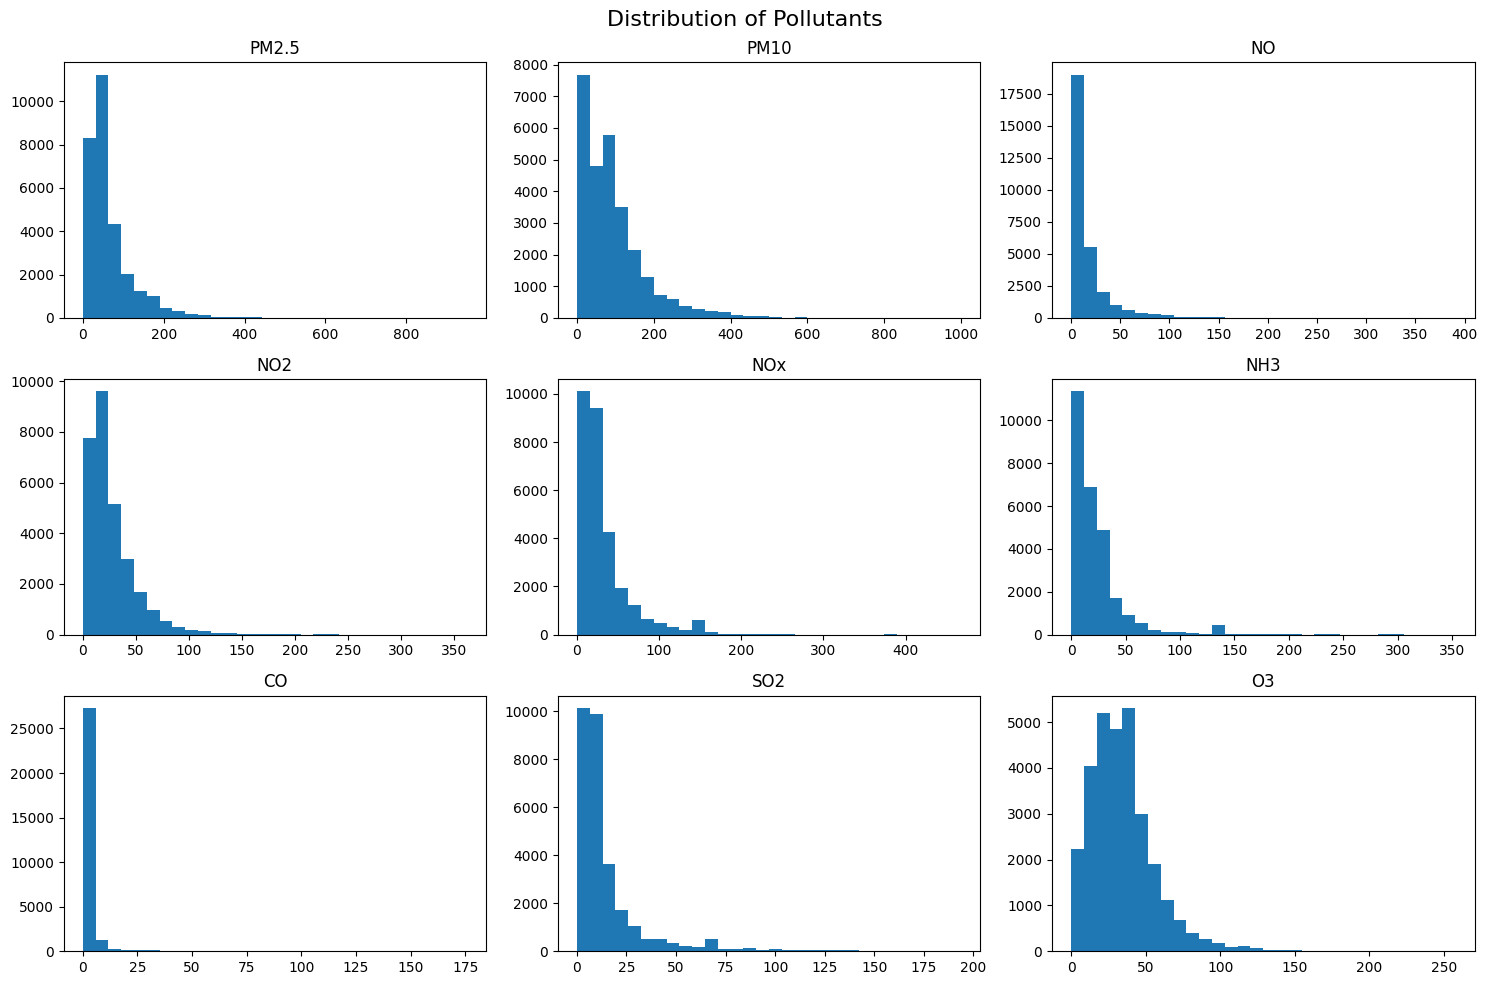

In [13]:
# Distribution of Pollutants

df[pollutants].hist(bins=30, figsize=(15, 10), grid=False)
plt.suptitle('Distribution of Pollutants', fontsize=16)
plt.tight_layout()
plt.show()

#insights:
# Most pollutants like pm2_5 and pm10 show right-skewed distributions, indicating occasional pollution spikes.
# CO and NH3 showed moderate skewness but mostly remained in lower concentration ranges.

<Axes: xlabel='year', ylabel='pm2_5'>

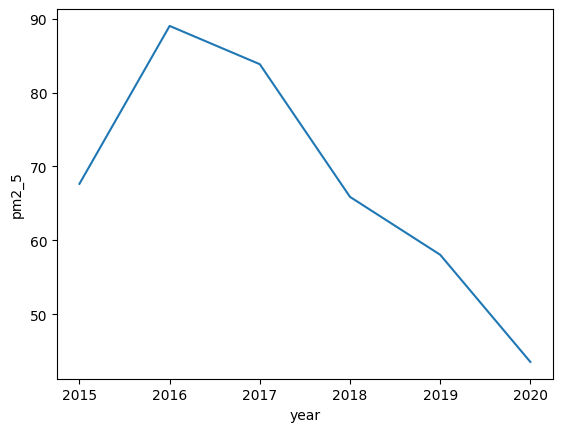

In [30]:
# Year-wise Trends of PM2.5

avg_pm = df.groupby('year')['pm2_5'].mean().reset_index()
sns.lineplot(data=avg_pm, x='year', y='pm2_5')

# insights:
# PM2.5 levels increased sharply in 2016 and showed a gradual decline post-2018, possibly due to seasonal regulations or weather changes.
# The year 2020 had the lowest average PM2.5, indicating improved air quality.


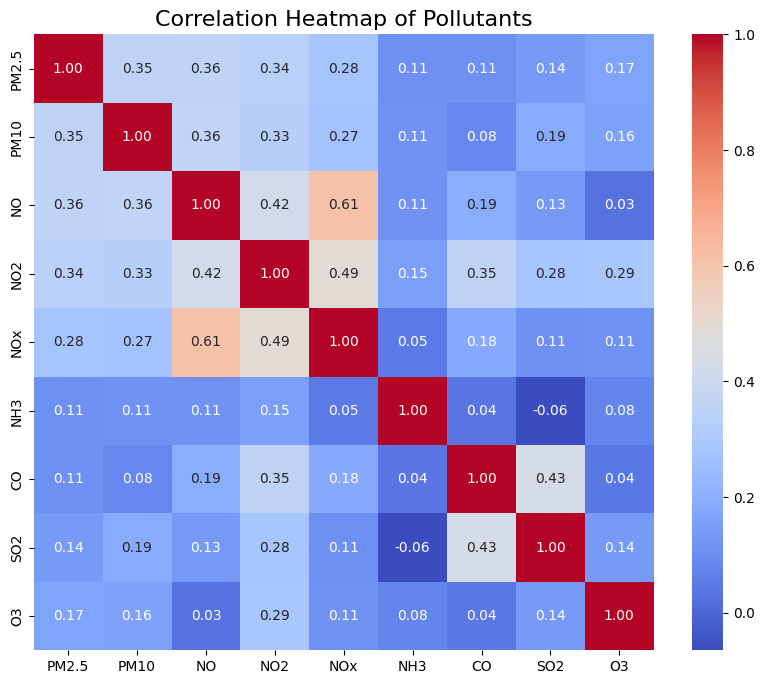

In [14]:
#  Correlation Between Pollutants

plt.figure(figsize=(10, 8))
corr = df[pollutants].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Pollutants", fontsize=16)
plt.show()

#insights:
# NO, NO2, and NOx are highly correlated, as expected, since they are nitrogen oxides from the same sources (e.g., vehicles).
# PM2.5 and PM10 also show strong correlation, indicating shared sources like construction and combustion.
# SO2 and O3 had lower correlation with others, suggesting different source origins.


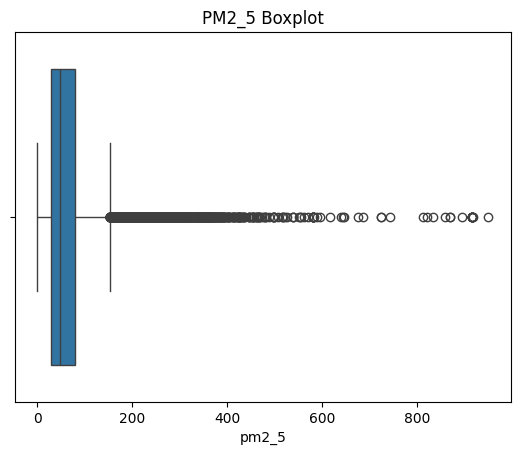

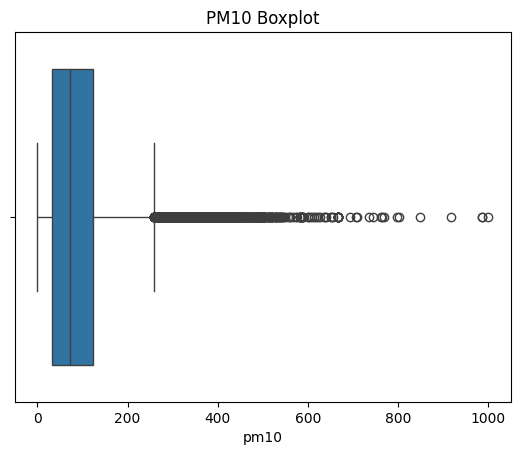

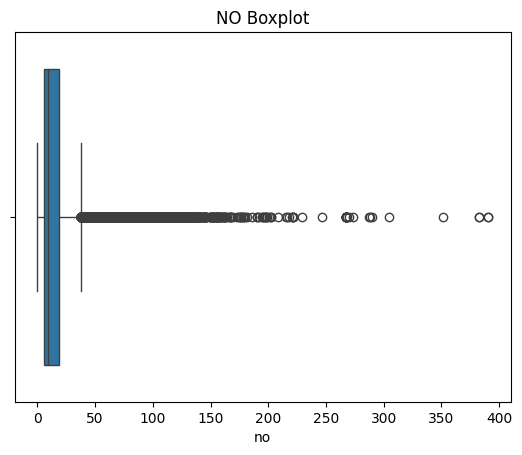

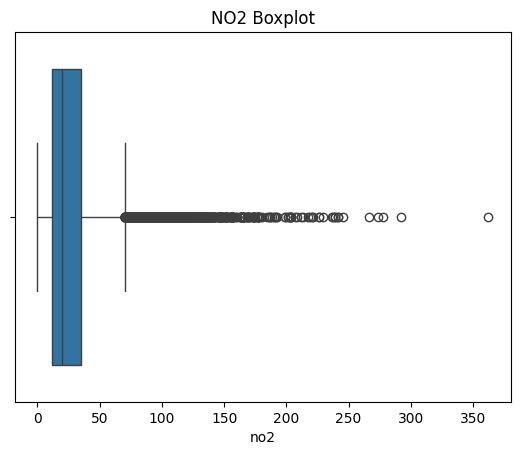

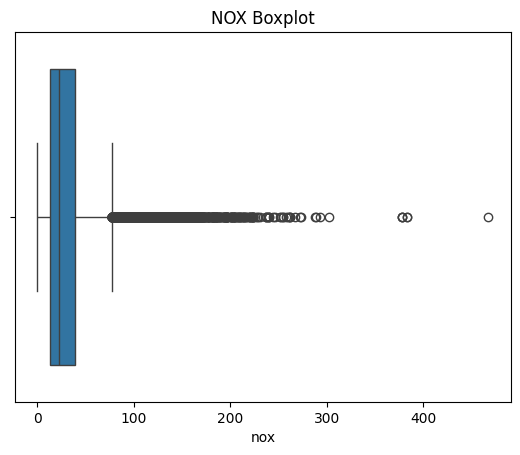

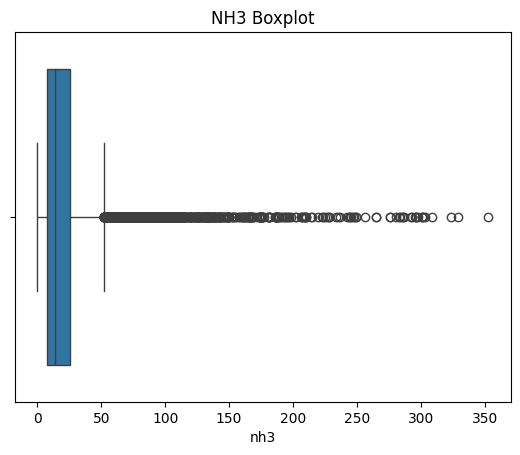

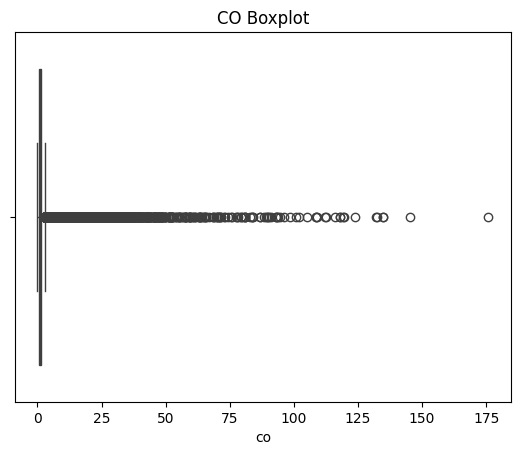

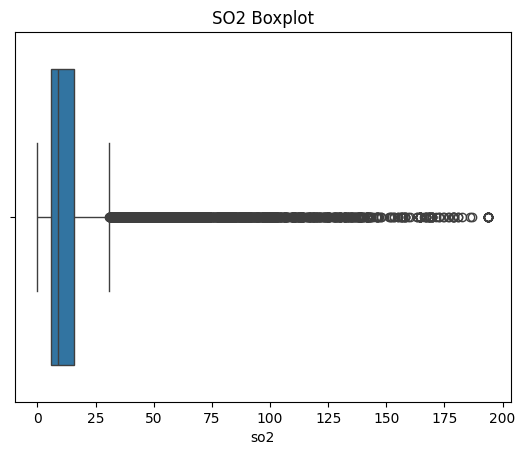

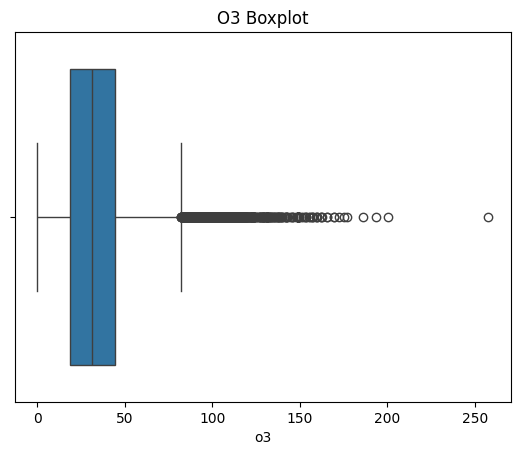

In [31]:
#  Boxplots for Outlier Detection

for pollutant in pollutants:
    sns.boxplot(x=df[pollutant])
    plt.title(f'{pollutant.upper()} Boxplot')
    plt.show()

# insights:
# Significant outliers exist in pm2_5, pm10, no, and co, suggesting extreme
# pollution events or data collection errors.
# This implies the need for robust statistical methods or domain-specific
# thresholds during preprocessing


In [23]:
print(df.columns.tolist())


['city', 'date', 'pm2.5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'co', 'so2', 'o3', 'benzene', 'toluene', 'xylene', 'aqi', 'aqi_bucket', 'year']


In [24]:
df.columns = df.columns.str.lower().str.replace('.', '_')


In [25]:
pollutants = ['pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'co', 'so2', 'o3']


In [26]:
df[pollutants].describe()


,pm2_5,pm10,no,no2,nox,nh3,co,so2,o3
count,29504.000000,27937.000000,29531.000000,29531.000000,29531.000000,27522.000000,29531.000000,29531.000000,29531.000000
mean,66.130899,95.070437,17.201890,26.909513,32.611069,22.359410,2.292734,15.650236,34.130603
std,64.130750,86.577554,23.245966,23.671982,33.829601,26.695912,6.824266,20.583528,21.631257
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000
25%,29.160000,31.580000,5.900000,11.630000,13.180000,7.820000,0.500000,5.740000,18.860000
50%,46.850000,72.380000,9.280000,19.720000,21.980000,13.395000,0.910000,8.950000,31.480000
75%,78.652500,122.290000,18.560000,35.030000,38.660000,25.500000,1.490000,15.840000,44.215000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000


In [27]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   city        29531 non-null  object        
 1   date        29531 non-null  datetime64[ns]
 2   pm2_5       29504 non-null  float64       
 3   pm10        27937 non-null  float64       
 4   no          29531 non-null  float64       
 5   no2         29531 non-null  float64       
 6   nox         29531 non-null  float64       
 7   nh3         27522 non-null  float64       
 8   co          29531 non-null  float64       
 9   so2         29531 non-null  float64       
 10  o3          29531 non-null  float64       
 11  benzene     29531 non-null  float64       
 12  toluene     29531 non-null  float64       
 13  xylene      29531 non-null  float64       
 14  aqi         29503 non-null  float64       
 15  aqi_bucket  29503 non-null  object        
 16  year        29531 non-

,date,pm2_5,pm10,no,no2,nox,nh3,co,so2,o3,benzene,toluene,xylene,aqi,year
count,29531,29504.000000,27937.000000,29531.000000,29531.000000,29531.000000,27522.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29503.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,66.130899,95.070437,17.201890,26.909513,32.611069,22.359410,2.292734,15.650236,34.130603,3.130408,7.027591,2.864628,162.865268,2017.887914
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000
25%,2017-04-16 00:00:00,29.160000,31.580000,5.900000,11.630000,13.180000,7.820000,0.500000,5.740000,18.860000,0.050000,0.280000,0.180000,76.000000,2017.000000
50%,2018-08-05 00:00:00,46.850000,72.380000,9.280000,19.720000,21.980000,13.395000,0.910000,8.950000,31.480000,0.670000,1.720000,1.250000,113.000000,2018.000000
75%,2019-09-03 00:00:00,78.652500,122.290000,18.560000,35.030000,38.660000,25.500000,1.490000,15.840000,44.215000,2.750000,6.710000,2.695000,205.000000,2019.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000
std,NaN,64.130750,86.577554,23.245966,23.671982,33.829601,26.695912,6.824266,20.583528,21.631257,15.988058,17.841550,5.383474,138.545194,1.533783
